In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
len(a.split('\n'))

80

In [4]:
yolo=cv2.dnn.readNet('yolov4-leaky.weights','yolov4-leaky.cfg')

In [50]:
img=cv2.imread('val2017/val2017/000000000139.jpg')
height,width,_=img.shape
blob=cv2.dnn.blobFromImage(img,1/255,(608,608),(0,0,0),swapRB=True, crop=False)

In [34]:
yolo.setInput(blob)

In [35]:
outputLayersName=yolo.getUnconnectedOutLayersNames()
layerOutput=yolo.forward(outputLayersName)

In [47]:
bboxs=[]
confidences=[]
classIds=[]
for output in layerOutput:
    for detection in output:
        scores=detection[5:] # The others is percentage of each class
        classId=np.argmax(scores)
        confidence=scores[classId]
        if confidence>0.7:
            x1=int((detection[0]-detection[2]/2)*width)
            y1=int((detection[1]-detection[3]/2)*height)
            x2=int((detection[0]+detection[2]/2)*width)
            y2=int((detection[1]+detection[3]/2)*height)
            
            bboxs.append((x1,y1,x2,y2))
            confidences.append(confidence)
            classIds.append(classId)
            

In [48]:
indexes=cv2.dnn.NMSBoxes(bboxs,confidences,0.5,0.4)

In [49]:
indexes

array([34, 22, 43, 44,  0, 32], dtype=int32)

In [51]:
for index in indexes:
    img = cv2.rectangle(img, (bboxs[index][0],bboxs[index][1]), (bboxs[index][2],bboxs[index][3]), (255,0,0), 1)

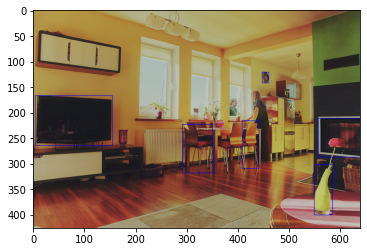

In [52]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.cv2.COLOR_BGR2RGB))